<a href="https://colab.research.google.com/github/megawattfs/schrayer-msai-research/blob/main/plot_pseudorandom_trajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook generates plots of the "pseudorandom" trajectories used in the 02.14.2021 version of the eye-movement classification model training data collection task (EMC).

In [1]:
!git clone http://github.com/megawattfs/schrayer-msai-research

Cloning into 'schrayer-msai-research'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 3), reused 26 (delta 1), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!ls schrayer-msai-research/

EMC_gaze.dlm  EMC_no_gaze.dlm  eye_movement_classification.ipynb   README.md
EMC_gaze.slx  EMC_no_gaze.slx  plot_pseudorandom_trajectories.csv


In [7]:
exam_data = pd.read_csv("schrayer-msai-research/plot_pseudorandom_trajectories.csv",skiprows=262)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
trajectory_data = exam_data[['Trial #','target_x','target_y']]

Next step: Convert string values to scientific notation

In [168]:
def sci_to_float(sci_string_arr):
  out_arr = np.zeros(sci_string_arr.size)
  for i in range(sci_string_arr.size):
    #Convert the string in scientific notation to a floating-point number
    sci_string = str(sci_string_arr[i])
    e_ind = sci_string.find('e')
    if e_ind == -1:#regular numeric conversion
      try:
        conv_float = float(sci_string)
      except ValueError:
        conv_float = float('NaN')
    else:
      try:
        base = float(sci_string[:e_ind])
        sign = sci_string[e_ind + 1]
        exp = int(sci_string[e_ind + 2:])
        if sign == '-':#Negative exponent
          conv_float = base * (10 ** (-1 * exp))
        else:#Positive exponent
          conv_float = base * (10 ** exp)
      except ValueError:
        conv_float = float('NaN')
    out_arr[i] = conv_float
  return out_arr

In [176]:
split_trajectory_data = np.array_split(trajectory_data, 5)

In [178]:
split_trajectory_data[0].head(50)

,Trial #,target_x,target_y
0,1,0,2.50000000e-01
1,NaN,0,2.50000000e-01
2,NaN,0,2.50000000e-01
3,NaN,0,2.50000000e-01
4,NaN,0,2.50000000e-01
5,NaN,0,2.50000000e-01
6,NaN,0,2.50000000e-01
7,NaN,0,2.50000000e-01
8,NaN,0,2.50000000e-01
9,NaN,0,2.50000000e-01


In [182]:
for traj in split_trajectory_data:
  traj.reset_index(inplace=True)
  traj['Trial #'] = pd.to_numeric(traj['Trial #'],errors='coerce')
  traj['target_x_float'] = pd.Series(sci_to_float(np.array(traj['target_x'])))
  traj['target_y_float'] = pd.Series(sci_to_float(np.array(traj['target_y'])))

In [183]:
traj_1 = split_trajectory_data[0]
traj_2 = split_trajectory_data[1]
traj_3 = split_trajectory_data[2]
traj_4 = split_trajectory_data[3]
traj_5 = split_trajectory_data[4]

In [184]:
traj_2.head(10)

,index,Trial #,target_x,target_y,target_x_float,target_y_float
0,7855,NaN,0,2.50000000e-01,0.0,0.25
1,7856,NaN,0,2.50000000e-01,0.0,0.25
2,7857,NaN,0,2.50000000e-01,0.0,0.25
3,7858,NaN,0,2.50000000e-01,0.0,0.25
4,7859,NaN,0,2.50000000e-01,0.0,0.25
5,7860,NaN,0,2.50000000e-01,0.0,0.25
6,7861,NaN,0,2.50000000e-01,0.0,0.25
7,7862,NaN,0,2.50000000e-01,0.0,0.25
8,7863,NaN,0,2.50000000e-01,0.0,0.25
9,7864,NaN,0,2.50000000e-01,0.0,0.25


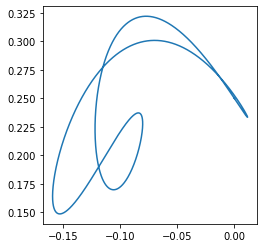

In [186]:
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(traj_1['target_x_float'],traj_1['target_y_float'])

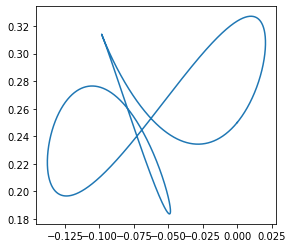

In [187]:
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(traj_2['target_x_float'],traj_2['target_y_float'])

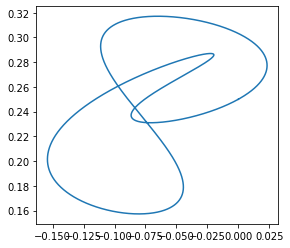

In [189]:
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(traj_3['target_x_float'],traj_3['target_y_float'])

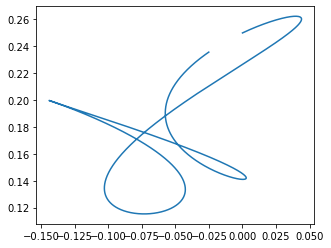

In [190]:
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(traj_4['target_x_float'],traj_4['target_y_float'])

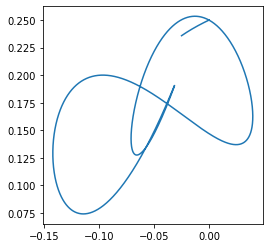

In [191]:
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(traj_5['target_x_float'],traj_5['target_y_float'])